In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import accuracy_score
import requests, zipfile, io
import os, glob
import random
import shutil


print(tf.__version__)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

2.9.1
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


In [2]:
data_dir = './data/hourse_vs_humans/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [3]:
r = requests.get('https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip', stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(data_dir)
z.close()

In [ ]:
# to install the validation data
# r = requests.get('https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip', stream=True)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# if not os.path.exists(os.path.join(data_dir, 'val')):
#     os.makedirs(os.path.join(data_dir, 'val'))
# z.extractall(os.path.join(data_dir, 'val'))
# z.close()

In [4]:
!ls ./data
print()
!ls ./data/hourse_vs_humans

hourse_vs_humans

horses
humans
train
validation


In [5]:
train_horse_dir = os.path.join(data_dir, 'horses')
train_human_dir = os.path.join(data_dir, 'humans')


train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [6]:
# create validation split from the training data

if os.path.exists(os.path.join(data_dir, 'train')):
    shutil.rmtree(os.path.join(data_dir, 'train'))

if os.path.exists(os.path.join(data_dir, 'validation')):
    shutil.rmtree(os.path.join(data_dir, 'validation'))

if not os.path.exists(os.path.join(data_dir, 'train')):
    os.makedirs(os.path.join(data_dir, 'train'))
    
if not os.path.exists(os.path.join(data_dir, 'train', 'hourses')):
    os.makedirs(os.path.join(data_dir, 'train', 'hourses'))

if not os.path.exists(os.path.join(data_dir, 'train', 'humans')):
    os.makedirs(os.path.join(data_dir, 'train', 'humans'))
    
if not os.path.exists(os.path.join(data_dir, 'validation')):
    os.makedirs(os.path.join(data_dir, 'validation'))
    
if not os.path.exists(os.path.join(data_dir, 'validation', 'hourses')):
    os.makedirs(os.path.join(data_dir, 'validation', 'hourses'))

if not os.path.exists(os.path.join(data_dir, 'validation', 'humans')):
    os.makedirs(os.path.join(data_dir, 'validation', 'humans'))
    

    
sample = random.sample(train_horse_names, int(len(train_horse_names) * 0.1))
for i in sample:
    shutil.move(os.path.join(train_horse_dir, i), os.path.join(data_dir, 'validation', 'hourses'))

sample = random.sample(train_human_names, int(len(train_human_names) * 0.1))
for i in sample:
    shutil.move(os.path.join(train_human_dir, i), os.path.join(data_dir, 'validation', 'humans'))


train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

for i in train_horse_names:
    shutil.move(os.path.join(train_horse_dir, i), os.path.join(data_dir, 'train', 'hourses'))

for i in train_human_names:
    shutil.move(os.path.join(train_human_dir, i), os.path.join(data_dir, 'train', 'humans'))
    

if os.path.exists(train_horse_dir):
    os.rmdir(train_horse_dir)
    
if os.path.exists(train_human_dir):
    os.rmdir(train_human_dir)

In [7]:
train_horse_dir = os.path.join(data_dir, 'train', 'hourses')
train_human_dir = os.path.join(data_dir, 'train', 'humans')


train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

total training horse images: 450
total training human images: 475


(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)


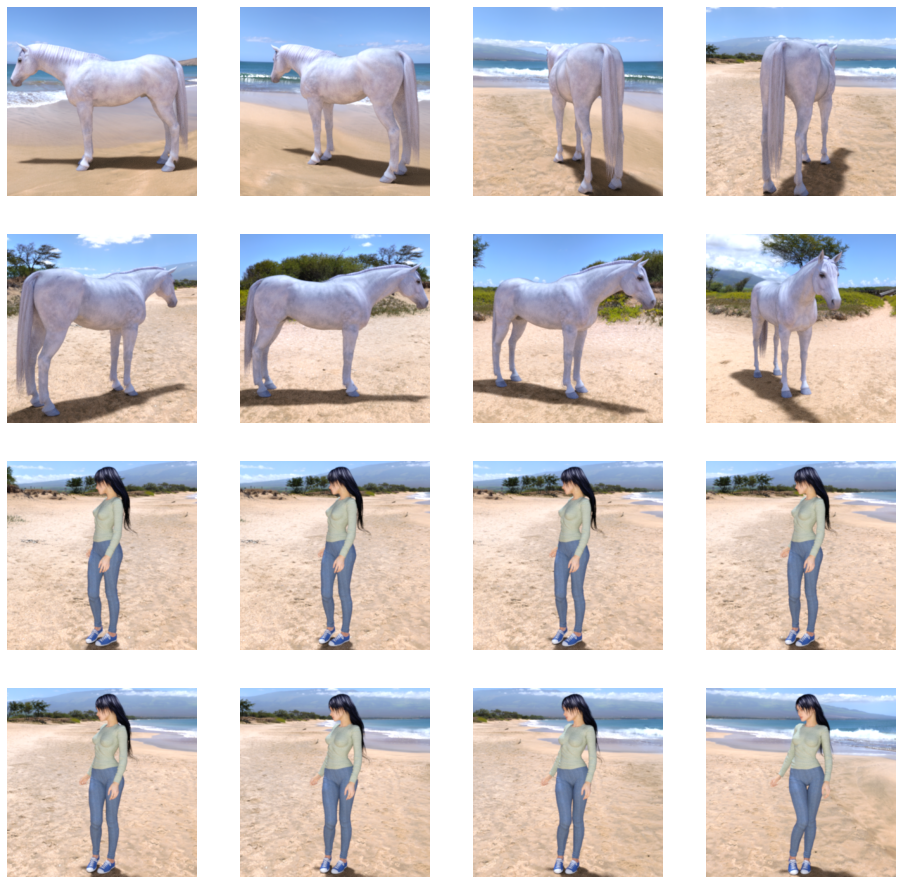

In [8]:
nrows = 4
ncols = 4

pic_index = 2


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    print(plt.imread(img_path).shape)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Nadam(),
    metrics = ['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
MODEL_NAME = './models/hourse_vs_human_full_verse.h5'
MONITOR = 'val_acc'
BATCH_SIZE = 16
EPOCHS = 70 
PATIENCE = 3

# Flow training images in batches of 128 using train_datagen generator
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=BATCH_SIZE,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

# Flow training images in batches of 128 using train_datagen generator
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    val_dir,  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=BATCH_SIZE,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 925 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [12]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor=MONITOR, factor=0.1, patience=PATIENCE, min_lr=1e-5)]
callbacks += [tf.keras.callbacks.ModelCheckpoint(MODEL_NAME, monitor=MONITOR, save_best_only=True)]
callbacks += [tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=PATIENCE+2, restore_best_weights=True)]

history = model.fit(
    train_generator,
    # steps_per_epoch=8,  
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/70
58/58 [==============================] - 11s 128ms/step - loss: 0.7162 - acc: 0.7611 - val_loss: 0.1795 - val_acc: 0.9216 - lr: 0.0010
Epoch 2/70
58/58 [==============================] - 5s 79ms/step - loss: 0.1398 - acc: 0.9481 - val_loss: 0.0321 - val_acc: 0.9902 - lr: 0.0010
Epoch 3/70
58/58 [==============================] - 5s 79ms/step - loss: 0.0805 - acc: 0.9741 - val_loss: 0.0166 - val_acc: 1.0000 - lr: 0.0010
Epoch 4/70
58/58 [==============================] - 4s 75ms/step - loss: 0.1100 - acc: 0.9751 - val_loss: 0.0040 - val_acc: 1.0000 - lr: 0.0010
Epoch 5/70
58/58 [==============================] - 4s 77ms/step - loss: 0.1757 - acc: 0.9665 - val_loss: 0.0682 - val_acc: 0.9804 - lr: 0.0010
Epoch 6/70
58/58 [==============================] - 4s 75ms/step - loss: 0.0660 - acc: 0.9838 - val_loss: 0.0526 - val_acc: 0.9804 - lr: 0.0010
Epoch 7/70
58/58 [==============================] - 4s 76ms/step - loss: 0.0139 - acc: 0.9946 - val_loss: 0.0371 - val_acc: 0.9804 - l

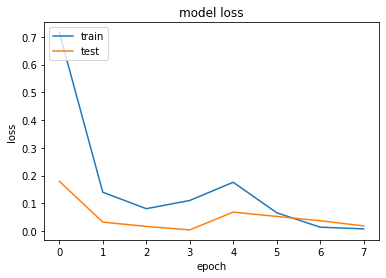

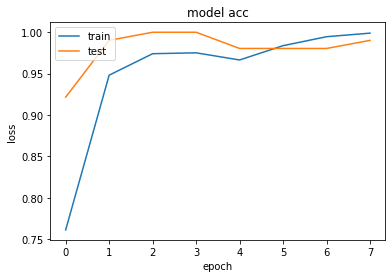

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 256ms/step


C:\Users\yazee\AppData\Local\Temp\ipykernel_8816\170571287.py:38: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()
C:\Users\yazee\AppData\Local\Temp\ipykernel_8816\170571287.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std()


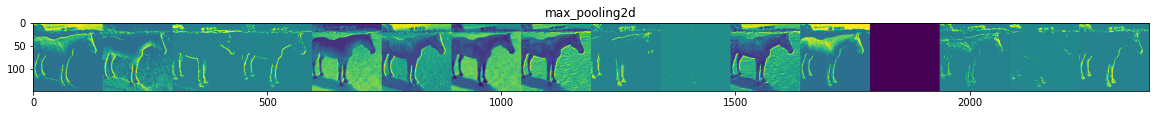

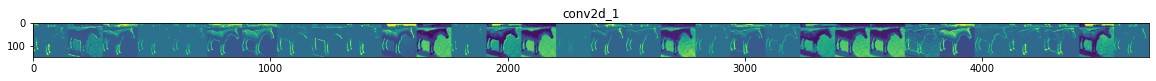

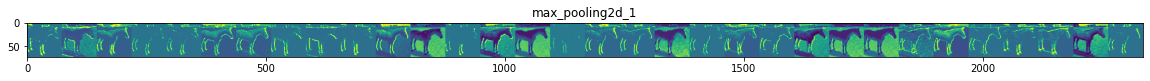

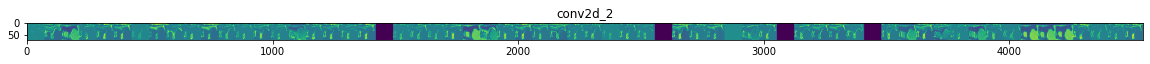

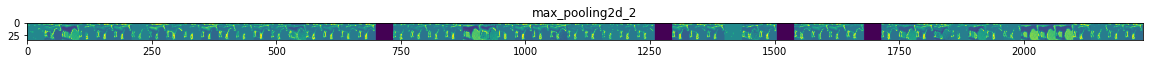

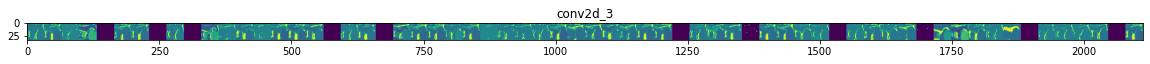

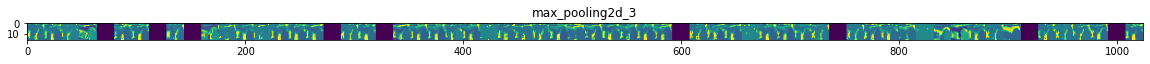

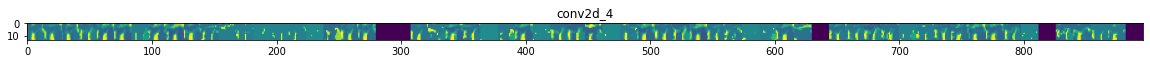

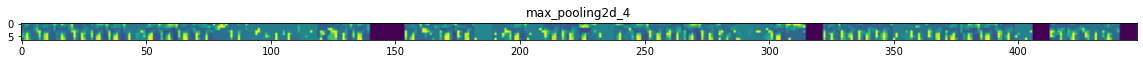

In [14]:
# Visualizing Intermediate Representations
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]


visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          x = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std()
          x *= 64
          x += 128
          x = np.clip(x, 0, 255).astype('uint8')

          # Tile each filter into this big horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')